In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'C:\Users\vyshn\Downloads\loan_prediction\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Droping the Load_ID column

In [3]:
df = df.drop('Loan_ID', axis=1)

In [4]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [7]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

distribution of the loan status column:



In [9]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

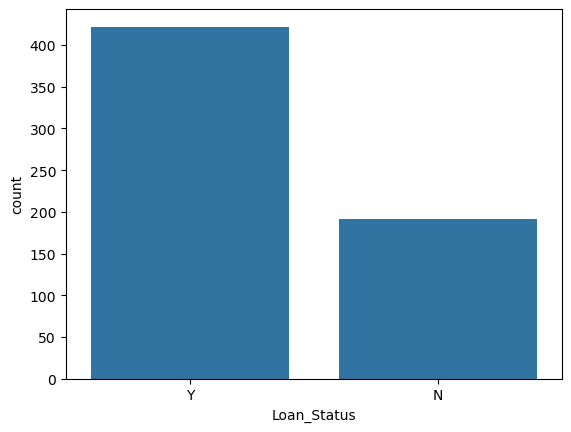

In [10]:
sns.countplot(df,x=df['Loan_Status'])

distribution of the martial status column:

Married
Yes    401
No     213
Name: count, dtype: int64

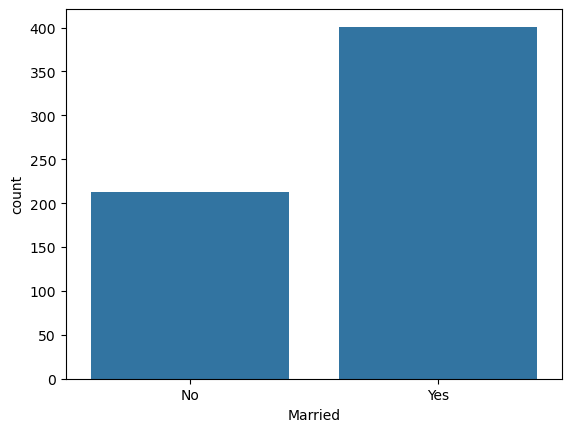

In [11]:
sns.countplot(df,x=df['Married'])
df['Married'].value_counts()

distribution of the gender column:



Gender
Male      502
Female    112
Name: count, dtype: int64

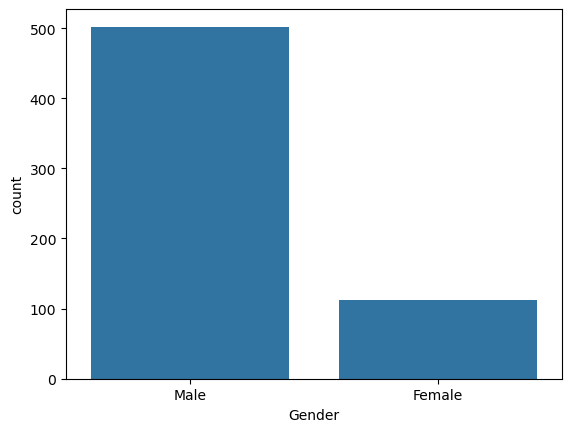

In [12]:
sns.countplot(df,x=df['Gender'])
df['Gender'].value_counts()

distribution of the education column:



Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

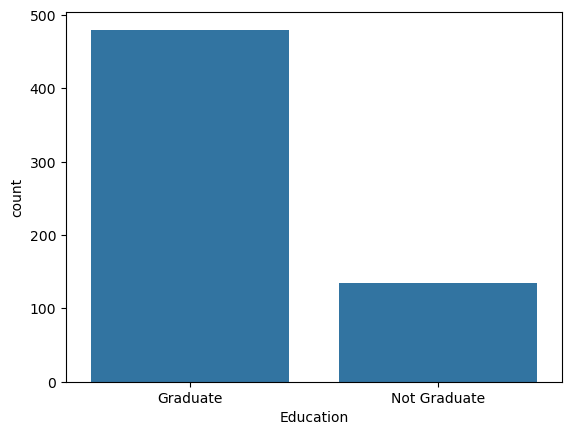

In [13]:
sns.countplot(df, x=df['Education'])
df['Education'].value_counts()

distribution of the self-employment column:



Self_Employed
No     532
Yes     82
Name: count, dtype: int64

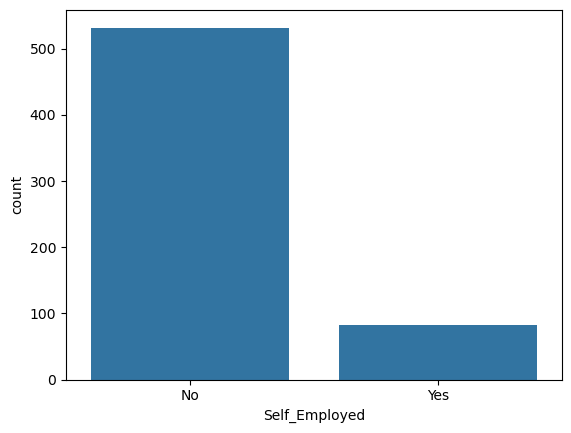

In [14]:
sns.countplot(df, x=df['Self_Employed'])
df['Self_Employed'].value_counts()

distribution of the Applicant Income column:


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

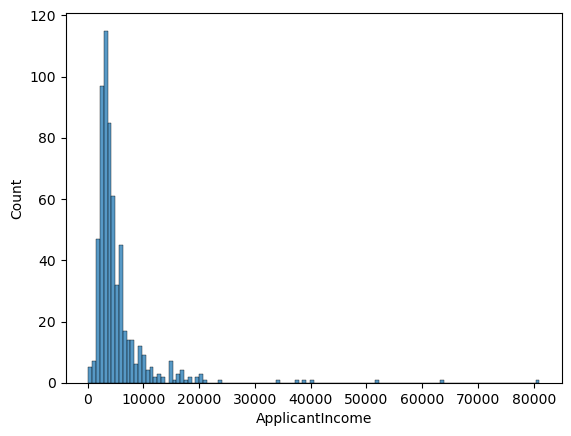

In [15]:
sns.histplot(df, x=df['ApplicantIncome'])

relationship between the income of the loan applicant and the loan status:



<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

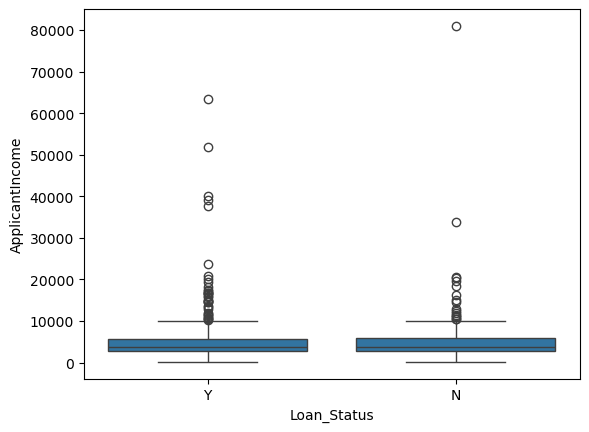

In [16]:
sns.boxplot(df, y='ApplicantIncome', x='Loan_Status')

"ApplicantIncome” column contains outliers which need to be removed before moving further

In [17]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound ) & (df['ApplicantIncome']<= upper_bound)]

relationship between the income of the loan co-applicant and the loan status

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

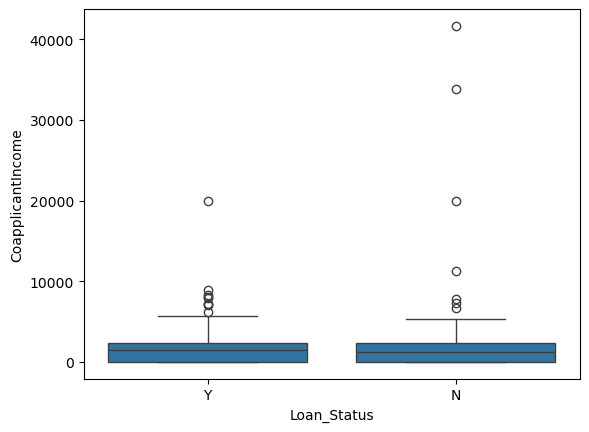

In [18]:
sns.boxplot(df, x='Loan_Status',y='CoapplicantIncome')

"CooapplicantIncome" column has outliers, which can be removed before going further

In [19]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q1 + 1.5*IQR

#Remove outliers
df = df[(df['CoapplicantIncome']>= lower_bound) & (df['CoapplicantIncome']<= upper_bound)]

relationship between the loan amount and the loan status:



<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

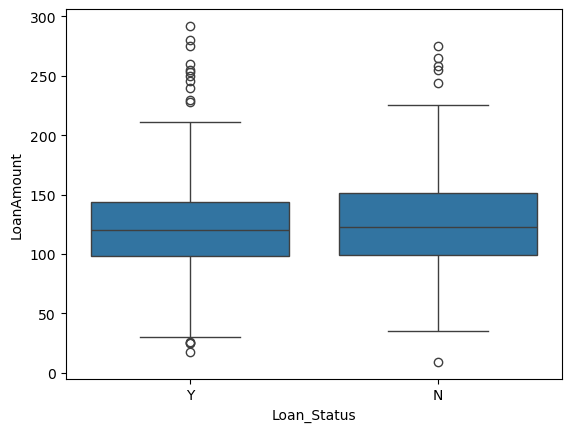

In [20]:
sns.boxplot(df, x='Loan_Status', y= 'LoanAmount')

relationship between credit history and loan status:



<Axes: xlabel='Loan_Status', ylabel='count'>

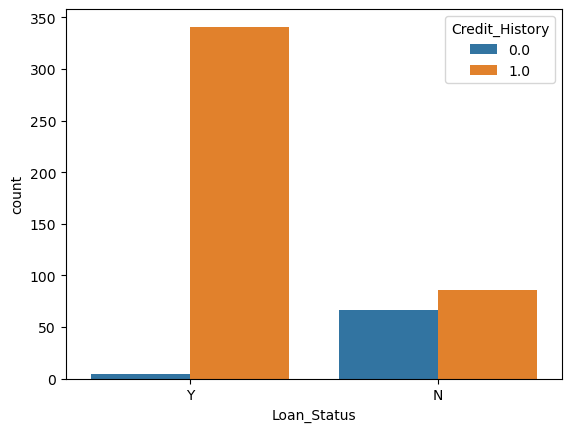

In [21]:
sns.countplot(df, x='Loan_Status', hue='Credit_History')

relationship between the property area and the loan status:



<Axes: xlabel='Loan_Status', ylabel='count'>

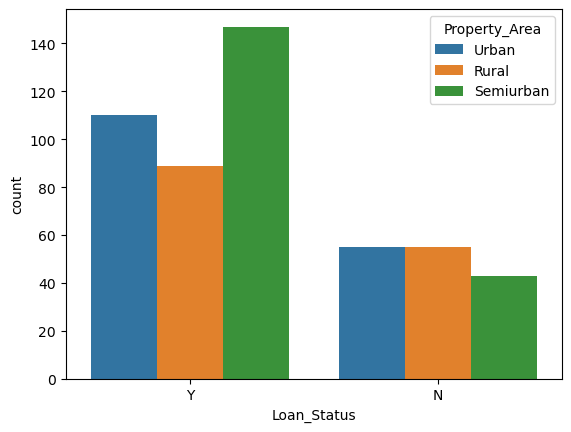

In [22]:
sns.countplot(df, x='Loan_Status', hue='Property_Area')

Data Preparation and Training Loan Approval Prediction Model


In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
#Convert categorical columns to Numerical using dummy variables
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed','Dependents', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols, dtype=int, drop_first=True)

In [25]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,0,0,1


In [26]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the numerical colums using StandardScaler
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

#fitting the mdoel
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          499 non-null    int64  
 1   CoapplicantIncome        499 non-null    float64
 2   LoanAmount               499 non-null    float64
 3   Loan_Amount_Term         499 non-null    float64
 4   Credit_History           499 non-null    float64
 5   Loan_Status              499 non-null    object 
 6   Gender_Male              499 non-null    int32  
 7   Married_Yes              499 non-null    int32  
 8   Education_Not Graduate   499 non-null    int32  
 9   Self_Employed_Yes        499 non-null    int32  
 10  Dependents_1             499 non-null    int32  
 11  Dependents_2             499 non-null    int32  
 12  Dependents_3+            499 non-null    int32  
 13  Property_Area_Semiurban  499 non-null    int32  
 14  Property_Area_Urban      499 no

In [28]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y']


In [29]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred

print(X_test_df)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
568        -0.933672          -0.938740   -2.572647          0.266145   
85         -0.939988           1.295971    0.227983          0.266145   
289         2.818683          -0.938740    1.352646          0.266145   
221        -0.075314           0.577261   -0.213061          0.266145   
295         0.138880           0.164930   -0.345374          0.266145   
..               ...                ...         ...               ...   
305        -1.132605          -0.938740    0.051566          0.266145   
469         0.095199           1.225336   -0.345374          0.266145   
23         -0.414237           0.753848   -0.301270          0.266145   
394        -0.553700           0.297370   -0.279217          0.266145   
405         0.207823          -0.938740   -0.235113          0.266145   

     Credit_History  Gender_Male  Married_Yes  Education_Not Graduate  \
568        0.416569            0            0     